<a href="https://colab.research.google.com/github/SezarTheGreat/Machine-learning-and-Deep-Learning/blob/main/CNN_Project_KARNAGE69_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !git clone https://github.com/karnage69/newapk.git
# %ls

In [2]:
#Importing required libraries.
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [3]:
#Data preperation: Sign Language MNIST
def load_data(csv_file):
    data = pd.read_csv(csv_file)
    # Remove the 'J' and 'Z' sign rows (labels 9, 25)
    data = data[~data['label'].isin([9, 25])].reset_index(drop=True)
    labels = data["label"].values
    images = data.iloc[:, 1:].values.reshape(-1, 28, 28, 1)
    # Re-map labels: skip 'J' and 'Z'
    labels = np.array([l - 1 if l > 9 else l for l in labels])
    return images, labels

train_images, train_labels = load_data(r"/content/newapk/archive/sign_mnist_train/sign_mnist_train.csv")
test_images, test_labels = load_data(r"/content/newapk/archive/sign_mnist_test/sign_mnist_test.csv")

# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Resize to (64, 64) and stack to 3 channels (RGB)
train_images = np.repeat(tf.image.resize(train_images, (64, 64)), 3, axis=-1)
test_images = np.repeat(tf.image.resize(test_images, (64, 64)), 3, axis=-1)

# One-hot encode labels
num_classes = 24  # A-Y without J and Z
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [4]:
#CNN model definition
model = models.Sequential([
    layers.Input(shape=(64, 64, 3)),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         6,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,196,824 (8.38 MB)

 Trainable params: 2,196,824 (8.38 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#Model Training
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = model.fit(train_images, train_labels,
                    epochs=20,
                    batch_size=64,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stop])

Epoch 1/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9975 - loss: 0.0096 - val_accuracy: 0.9186 - val_loss: 0.5917
Epoch 2/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9974 - loss: 0.0104 - val_accuracy: 0.9193 - val_loss: 0.4719
Epoch 3/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9976 - loss: 0.0095 - val_accuracy: 0.9129 - val_loss: 0.5169
Epoch 4/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9987 - loss: 0.0040 - val_accuracy: 0.9219 - val_loss: 0.5881
Epoch 5/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9988 - loss: 0.0031 - val_accuracy: 0.9144 - val_loss: 0.5205
Epoch 6/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9973 - loss: 0.0091 - val_accuracy: 0.9194 - val_loss: 0.5370
Epoch 7/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9983 - loss: 0.0051 - val_accuracy: 0.9293 - val_loss: 0.5015
Epoch 8/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9998 - loss: 6.9216e-04 - val_

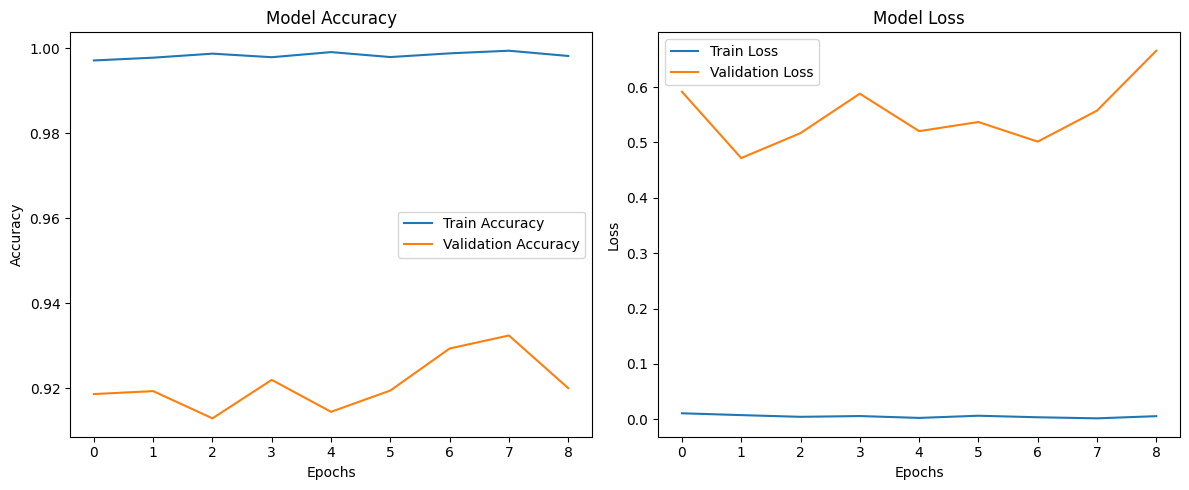

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

def evaluate_model(model, test_images, test_labels, labels_map):
    preds = model.predict(test_images)
    y_true = np.argmax(test_labels, axis=1)
    y_pred = np.argmax(preds, axis=1)

    accuracy = accuracy_score(y_true, y_pred)
    print(f"Test Accuracy: {accuracy * 100:.2f}%\n")
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=labels_map))

# Usage
labels_map = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
    'S', 'T', 'U', 'V', 'W', 'X', 'Y'
]
evaluate_model(model, test_images, test_labels, labels_map)


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Accuracy: 91.93%

Classification Report:
              precision    recall  f1-score   support

           A       0.97      1.00      0.99       331
           B       1.00      0.95      0.97       432
           C       1.00      1.00      1.00       310
           D       1.00      1.00      1.00       245
           E       0.96      0.95      0.95       498
           F       1.00      1.00      1.00       247
           G       0.93      0.92      0.92       348
           H       0.93      0.94      0.94       436
           I       0.98      1.00      0.99       288
           K       0.72      0.94      0.82       331
           L       0.96      1.00      0.98       209
           M       0.96      0.94      0.95       394
           N       0.84      0.83      0.84       291
           O       1.00      0.83      0.91       246
           P       0.99      0.94      0.96       347
           Q       0.89      1.00      0.94     